In [112]:
#importing the datasets
#the first one contains the metadata
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
df=pd.read_csv(r'C:\Users\HP\Desktop\books.csv')
df=df.dropna(axis='rows',subset=['original_title']).reset_index(drop=True)
df

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9411,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9412,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9413,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [113]:
#relevant columns are taken
df=df[['original_title','authors','book_id','image_url','original_publication_year','average_rating','ratings_count']]
df

,original_title,authors,book_id,image_url,original_publication_year,average_rating,ratings_count
0,The Hunger Games,Suzanne Collins,2767052,https://images.gr-assets.com/books/1447303603m...,2008.0,4.34,4780653
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",3,https://images.gr-assets.com/books/1474154022m...,1997.0,4.44,4602479
2,Twilight,Stephenie Meyer,41865,https://images.gr-assets.com/books/1361039443m...,2005.0,3.57,3866839
3,To Kill a Mockingbird,Harper Lee,2657,https://images.gr-assets.com/books/1361975680m...,1960.0,4.25,3198671
4,The Great Gatsby,F. Scott Fitzgerald,4671,https://images.gr-assets.com/books/1490528560m...,1925.0,3.89,2683664
...,...,...,...,...,...,...,...
9410,Bayou Moon,Ilona Andrews,7130616,https://images.gr-assets.com/books/1307445460m...,2010.0,4.09,17204
9411,Means of Ascent,Robert A. Caro,208324,https://s.gr-assets.com/assets/nophoto/book/11...,1990.0,4.25,12582
9412,The Mauritius Command,Patrick O'Brian,77431,https://images.gr-assets.com/books/1455373531m...,1977.0,4.35,9421
9413,Cinderella Ate My Daughter: Dispatches from th...,Peggy Orenstein,8565083,https://images.gr-assets.com/books/1279214118m...,2011.0,3.65,11279


In [114]:
#sorting based on book_id
df=df.sort_values(by='book_id',ascending=True).reset_index(drop=True)
df

,original_title,authors,book_id,image_url,original_publication_year,average_rating,ratings_count
0,Harry Potter and the Half-Blood Prince,"J.K. Rowling, Mary GrandPré",1,https://images.gr-assets.com/books/1361039191m...,2005.0,4.54,1678823
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré",2,https://images.gr-assets.com/books/1387141547m...,2003.0,4.46,1735368
2,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",3,https://images.gr-assets.com/books/1474154022m...,1997.0,4.44,4602479
3,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPré, Rufus Beck",5,https://images.gr-assets.com/books/1499277281m...,1999.0,4.53,1832823
4,Harry Potter and the Goblet of Fire,"J.K. Rowling, Mary GrandPré",6,https://images.gr-assets.com/books/1361482611m...,2000.0,4.53,1753043
...,...,...,...,...,...,...,...
9410,"Short Stories from Hogwarts of Heroism, Hardsh...","J.K. Rowling, MinaLima",31538635,https://images.gr-assets.com/books/1471436733m...,2016.0,4.22,16285
9411,Hogwarts: An Incomplete and Unreliable Guide,J.K. Rowling,31538647,https://images.gr-assets.com/books/1502156557m...,2016.0,4.21,14977
9412,Love Warrior,Glennon Doyle Melton,31845516,https://images.gr-assets.com/books/1473164102m...,2016.0,4.10,20094
9413,The Hate U Give,Angie Thomas,32075671,https://images.gr-assets.com/books/1476284759m...,2017.0,4.62,32610


In [115]:
#the second dataset contains the book_id of the books the user has recommended
to_read=pd.read_csv(r'C:\Users\HP\Desktop\to_read.csv')
to_read
#these are some books that the user has marked to read

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874
...,...,...
912700,53424,4716
912701,53424,4844
912702,53424,5907
912703,53424,7569


In [116]:
#the most important dataset which contains the ratings each book has received by the users
ratings=pd.read_csv(r'C:\Users\HP\Desktop\ratings.csv')
ratings
#the ratingss are out of 5

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [117]:
# The following table will show which pair of user-book have more than 1 rating in the dataset: 

userRatesPerBookCount = ratings.groupby(['user_id', 'book_id'], as_index = False).count().sort_values('rating', ascending = False)
userRatesPerBookCount.head(15)

,user_id,book_id,rating
59787,3204,8946,5
729574,38259,3996,4
11033,691,6472,4
665335,34548,7420,4
81315,4359,2515,4
42643,2308,8946,4
572,42,8946,4
95001,5091,8946,4
81324,4359,3470,3
54390,2935,8946,3


In [118]:
# Let's check if this is true:

ratings[(ratings.user_id == 3204) & (ratings.book_id == 8946)]

,book_id,user_id,rating
883706,8946,3204,5
883707,8946,3204,5
883708,8946,3204,5
883709,8946,3204,5
883710,8946,3204,4


In [119]:
# Here I calculate the rating mean per user and book, so that I can later replace the mean to the rating value
# and get rid of the duplicates rows

userRatesPerBookMean = ratings.groupby(['user_id', 'book_id'], as_index = False).mean().round(0).sort_values('rating', ascending = False)
userRatesPerBookMean.head(15)

,user_id,book_id,rating
489739,25094,6395,5.0
280452,14074,4053,5.0
280426,14074,1753,5.0
671540,34898,4929,5.0
280423,14074,1633,5.0
280422,14074,1603,5.0
280421,14074,1560,5.0
280420,14074,1533,5.0
280418,14074,1493,5.0
280417,14074,1434,5.0


In [120]:
# We create a table grouped by user and book pair, calculating mean and number of rating that a user has made for the
# same book

ratings['count'] = ratings['rating']

userRatesPerBook = ratings.groupby(['user_id', 'book_id'], as_index = False) \
                   .agg({'rating' : 'mean', 'count' : 'count'}) \
                   .rename(columns = {'rating':'mean'}) \
                   .sort_values('count', ascending = False)

ratings = ratings.drop(['count'], axis = 1)
            
userRatesPerBook['mean'] = userRatesPerBook['mean'].round(0)
userRatesPerBook

,user_id,book_id,mean,count
59787,3204,8946,5.0,5
729574,38259,3996,5.0,4
11033,691,6472,5.0,4
665335,34548,7420,5.0,4
81315,4359,2515,5.0,4
...,...,...,...,...
327108,16513,5714,4.0,1
327109,16513,6558,3.0,1
327110,16513,7026,3.0,1
327111,16513,7638,5.0,1


In [121]:


ratings = pd.merge(ratings, userRatesPerBook, on = ['user_id', 'book_id'])
ratings.head()
ratings.sort_values('count', ascending = False).head(15)

,book_id,user_id,rating,mean,count
883710,8946,3204,4,5.0,5
883706,8946,3204,5,5.0,5
883709,8946,3204,5,5.0,5
883708,8946,3204,5,5.0,5
883707,8946,3204,5,5.0,5
251241,2515,4359,5,5.0,4
883651,8946,42,5,5.0,4
399011,3996,38259,5,5.0,4
883720,8946,5091,5,5.0,4
883719,8946,5091,5,5.0,4


In [122]:
#dropping the duplicates

ratings = ratings.drop_duplicates(subset = ['book_id', 'user_id'], keep = 'first', inplace = False)\
                                  .sort_values('count', ascending = False)
ratings = ratings.drop(['rating', 'count'], axis = 1)
ratings

,book_id,user_id,mean
883706,8946,3204,5.0
399011,3996,38259,5.0
883651,8946,42,5.0
883697,8946,2308,5.0
736954,7420,34548,5.0
...,...,...,...
327410,3278,11285,3.0
327411,3278,12088,5.0
327412,3278,12471,4.0
327413,3278,12779,4.0


In [123]:
ratings.describe()
#we have a total of approx 980K ratings with a mean of 3.8
#also 75% of the books are rated 5 which is the maximum rating

,book_id,user_id,mean
count,979478.000000,979478.000000,979478.000000
mean,4942.302335,25628.096879,3.856064
std,2873.257347,15224.438923,0.983760
min,1.000000,1.000000,1.000000
25%,2455.000000,12383.000000,3.000000
50%,4919.000000,25094.000000,4.000000
75%,7413.000000,38578.000000,5.000000
max,10000.000000,53424.000000,5.000000


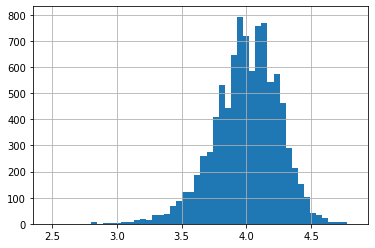

In [124]:
%matplotlib inline
df['average_rating'].hist(bins=50)
#most book have an average rating in the range of 4-4.5

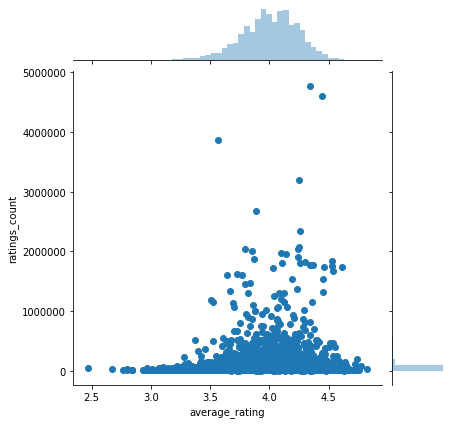

In [125]:
sns.jointplot(x='average_rating', y='ratings_count', data=df)
#From the diagram it is clear that most movies 
#have few ratings. Movies with most ratings are those that are most famous.

In [126]:
#ratings per user
ratings.columns = ['book_id', 'user_id', 'rating']
ratesPerUser = ratings[['user_id', 'rating']].groupby(['user_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'totalRatings'}) \
                     .sort_values('totalRatings', ascending = False)
ratesPerUser


,user_id,totalRatings
12873,12874,200
30943,30944,200
52035,52036,199
12380,12381,199
28157,28158,199
...,...,...
1157,1158,1
39656,39657,1
37044,37045,1
31451,31452,1


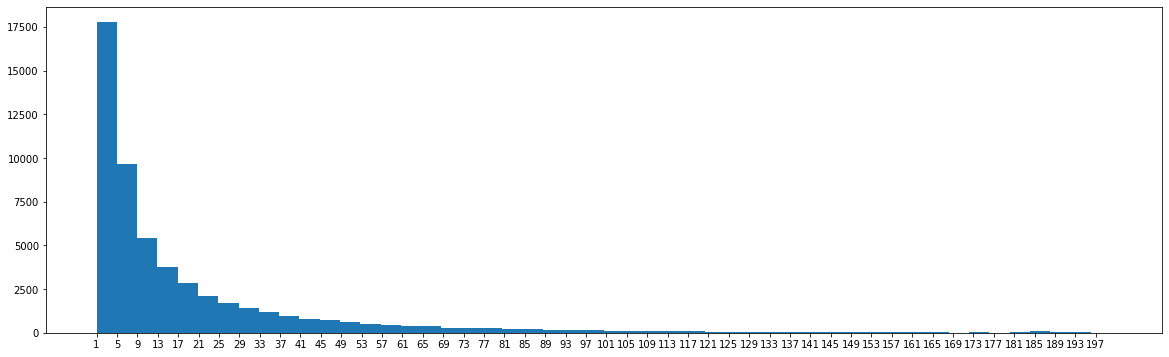

In [127]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.hist(ratesPerUser['totalRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerUser['totalRatings']), max(ratesPerUser['totalRatings'])+1, 4.0))
plt.show()

In [128]:
ratings = pd.merge(ratings, ratesPerUser, on = ['user_id'])
ratings.sort_values('totalRatings', ascending = False).head(10)

,book_id,user_id,rating,totalRatings
486526,81,12874,4.0,200
977600,1492,30944,4.0,200
977605,2209,30944,5.0,200
977604,2269,30944,5.0,200
977603,1431,30944,5.0,200
977602,1391,30944,3.0,200
977782,3077,30944,5.0,200
977707,245,30944,4.0,200
977706,232,30944,5.0,200
977705,239,30944,4.0,200


In [129]:
# Keeping only users with more than a 'minimum' of ratings
minimumRatings = ratings.totalRatings <= 20
np.sum(minimumRatings)

272086

In [130]:
ratings = ratings[-minimumRatings]
#total ratings 
#remaining users and books
print(str(len(ratings))+'\n'+str(len(ratings.user_id.unique()))+'\n'+str(len(ratings.book_id.unique())))

707392
13971
9998


In [131]:
ratesPerBook = ratings[['book_id', 'rating']].groupby(['book_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'receivedRatings'}) \
                      .sort_values('receivedRatings', ascending = False)

ratesPerBook.tail()

,book_id,receivedRatings
9342,9345,2
9855,9858,1
9087,9090,1
8802,8804,1
8371,8372,1


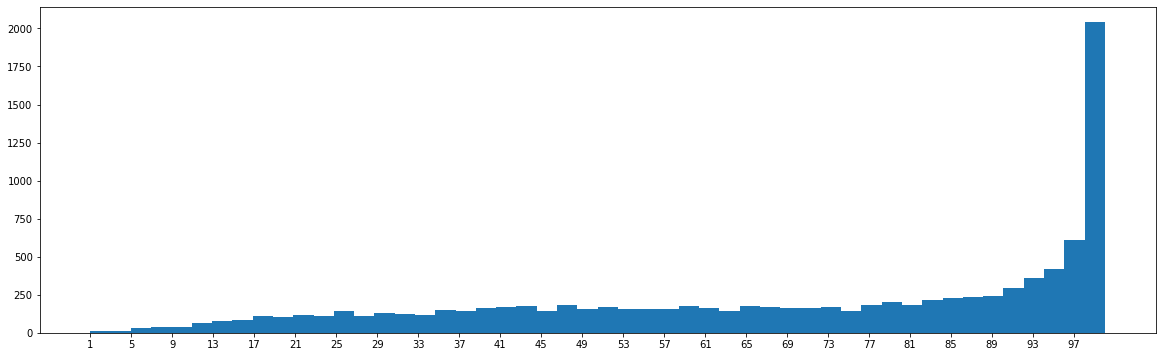

In [132]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.hist(ratesPerBook['receivedRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerBook['receivedRatings']), max(ratesPerBook['receivedRatings'])+1, 4.0))
plt.show()


In [133]:
ratings = pd.merge(ratings, ratesPerBook, on = ['book_id'])

In [134]:
# Keeping only books with more than a 'minimum' of ratings received

minimumReceived = ratings.receivedRatings < 30
np.sum(minimumReceived)

21710

In [135]:
ratings = ratings[-minimumReceived]

print(str(len(ratings))+'\n'+str(len(ratings.user_id.unique()))+'\n'+str(len(ratings.book_id.unique())))

685682
13970
8885


In [137]:
#showingTitles = pd.merge(ratings, df[['book_id', 'authors', 'original_title']], how = 'left', left_on = ['book_id'], right_on = ['book_id'])
#showingTitles = showingTitles.groupby(['book_id'], as_index = False) #\
                      
#showingTitles.sort_values('rating', ascending = False).head(10)

# 1) CONTENT BASED FILTERING(TAG BASED)

In [138]:
tags=pd.read_csv(r'C:\Users\HP\Desktop\tags.csv')
booktags=pd.read_csv(r'C:\Users\HP\Desktop\book_tags.csv')

In [139]:
showingTag = pd.merge(booktags, tags, on = 'tag_id')
showingTag=showingTag[['book_id','tag_id','tag_name']]
showingTag.sort_values('book_id').head(25)



,book_id,tag_id,tag_name
0,1,30574,to-read
258362,1,33165,youth
250046,1,17213,kindle
246919,1,27535,shelfari-favorites
245888,1,16799,juvenile
245375,1,18851,made-me-cry
240136,1,25151,read-in-2015
238876,1,11550,favorite-series
237950,1,11491,faves
237815,1,32654,wizards


In [140]:
#sorting the most used tags
mostUsedTags = showingTag.groupby(['tag_name'], as_index = False) \
                      .agg({'book_id' : 'count'}) \
                      .rename(columns = {'book_id' : 'number'}) \
                      .sort_values('number', ascending = False)
mostUsedTags.head(10)

,tag_name,number
30574,to-read,9983
11557,favorites,9881
22743,owned,9858
5207,books-i-own,9799
8717,currently-reading,9776
18045,library,9415
22753,owned-books,9221
11743,fiction,9097
30521,to-buy,8692
17213,kindle,8316


In [141]:
genres=pd.read_csv(r'C:\Users\HP\Desktop\genres.csv')
genres

,Unnamed: 0,tag_name
0,0,art
1,1,biography
2,2,business
3,3,children-s
4,4,christian
...,...,...
1230,1536,zambia
1231,1537,zen
1232,1538,zimbabwe
1233,1539,zombies


In [142]:
genreList = genres['tag_name'].tolist()
genreTags = tags.loc[tags['tag_name'].isin(genreList)]
len(genreTags)
#832 tags are the most common genre tags

832

In [143]:
genreTags.head()

,tag_id,tag_name
283,283,10th-century
297,297,11th-century
307,307,12th-century
317,317,13th-century
327,327,14th-century


In [144]:
mostCommonTags = pd.merge(booktags, genreTags, on = ['tag_id'])
stringedTags = mostCommonTags.groupby('book_id')['tag_name'].apply(lambda x: "%s" % ' '.join(x)).reset_index()
stringedTags

,book_id,tag_name
0,1,fantasy young-adult fiction magic childrens ad...
1,2,fantasy young-adult fiction magic children-s n...
2,3,fantasy young-adult fiction magic childrens ad...
3,5,fantasy young-adult fiction magic childrens ad...
4,6,fantasy young-adult fiction childrens adventur...
...,...,...
9995,31538647,fantasy young-adult fiction magic childrens ch...
9996,31845516,fiction contemporary love adult abandoned eboo...
9997,32075671,young-adult fiction novels teen romance contem...
9998,32848471,fiction romance contemporary love humor funny ...


In [145]:
book=pd.merge(df,stringedTags,on=['book_id'])
book

,original_title,authors,book_id,image_url,original_publication_year,average_rating,ratings_count,tag_name
0,Harry Potter and the Half-Blood Prince,"J.K. Rowling, Mary GrandPré",1,https://images.gr-assets.com/books/1361039191m...,2005.0,4.54,1678823,fantasy young-adult fiction magic childrens ad...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré",2,https://images.gr-assets.com/books/1387141547m...,2003.0,4.46,1735368,fantasy young-adult fiction magic children-s n...
2,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",3,https://images.gr-assets.com/books/1474154022m...,1997.0,4.44,4602479,fantasy young-adult fiction magic childrens ad...
3,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPré, Rufus Beck",5,https://images.gr-assets.com/books/1499277281m...,1999.0,4.53,1832823,fantasy young-adult fiction magic childrens ad...
4,Harry Potter and the Goblet of Fire,"J.K. Rowling, Mary GrandPré",6,https://images.gr-assets.com/books/1361482611m...,2000.0,4.53,1753043,fantasy young-adult fiction childrens adventur...
...,...,...,...,...,...,...,...,...
9410,"Short Stories from Hogwarts of Heroism, Hardsh...","J.K. Rowling, MinaLima",31538635,https://images.gr-assets.com/books/1471436733m...,2016.0,4.22,16285,fantasy young-adult fiction magic childrens ad...
9411,Hogwarts: An Incomplete and Unreliable Guide,J.K. Rowling,31538647,https://images.gr-assets.com/books/1502156557m...,2016.0,4.21,14977,fantasy young-adult fiction magic childrens ch...
9412,Love Warrior,Glennon Doyle Melton,31845516,https://images.gr-assets.com/books/1473164102m...,2016.0,4.10,20094,fiction contemporary love adult abandoned eboo...
9413,The Hate U Give,Angie Thomas,32075671,https://images.gr-assets.com/books/1476284759m...,2017.0,4.62,32610,young-adult fiction novels teen romance contem...


In [146]:
#removing spaces & ','  from authors names
book['authors'] = book['authors'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
book['authors'] = book['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))
book

,original_title,authors,book_id,image_url,original_publication_year,average_rating,ratings_count,tag_name
0,Harry Potter and the Half-Blood Prince,j.k.rowling marygrandpré,1,https://images.gr-assets.com/books/1361039191m...,2005.0,4.54,1678823,fantasy young-adult fiction magic childrens ad...
1,Harry Potter and the Order of the Phoenix,j.k.rowling marygrandpré,2,https://images.gr-assets.com/books/1387141547m...,2003.0,4.46,1735368,fantasy young-adult fiction magic children-s n...
2,Harry Potter and the Philosopher's Stone,j.k.rowling marygrandpré,3,https://images.gr-assets.com/books/1474154022m...,1997.0,4.44,4602479,fantasy young-adult fiction magic childrens ad...
3,Harry Potter and the Prisoner of Azkaban,j.k.rowling marygrandpré rufusbeck,5,https://images.gr-assets.com/books/1499277281m...,1999.0,4.53,1832823,fantasy young-adult fiction magic childrens ad...
4,Harry Potter and the Goblet of Fire,j.k.rowling marygrandpré,6,https://images.gr-assets.com/books/1361482611m...,2000.0,4.53,1753043,fantasy young-adult fiction childrens adventur...
...,...,...,...,...,...,...,...,...
9410,"Short Stories from Hogwarts of Heroism, Hardsh...",j.k.rowling minalima,31538635,https://images.gr-assets.com/books/1471436733m...,2016.0,4.22,16285,fantasy young-adult fiction magic childrens ad...
9411,Hogwarts: An Incomplete and Unreliable Guide,j.k.rowling,31538647,https://images.gr-assets.com/books/1502156557m...,2016.0,4.21,14977,fantasy young-adult fiction magic childrens ch...
9412,Love Warrior,glennondoylemelton,31845516,https://images.gr-assets.com/books/1473164102m...,2016.0,4.10,20094,fiction contemporary love adult abandoned eboo...
9413,The Hate U Give,angiethomas,32075671,https://images.gr-assets.com/books/1476284759m...,2017.0,4.62,32610,young-adult fiction novels teen romance contem...


In [147]:
Title=book['original_title']
finaldata=pd.DataFrame(Title)
finaldata['Title']=finaldata['original_title']
finaldata=finaldata.drop('original_title',axis=1)
#bag of words
finaldata['bag_of_words']=book['authors']+' '+book['tag_name']
#Converting the text to lowercase to avoid duplication and removing '|'
finaldata['bag_of_words']=finaldata['bag_of_words'].str.lower()
finaldata=finaldata.fillna(' ')
finaldata
#now our dataset is ready for modelLing


,Title,bag_of_words
0,Harry Potter and the Half-Blood Prince,j.k.rowling marygrandpré fantasy young-adult f...
1,Harry Potter and the Order of the Phoenix,j.k.rowling marygrandpré fantasy young-adult f...
2,Harry Potter and the Philosopher's Stone,j.k.rowling marygrandpré fantasy young-adult f...
3,Harry Potter and the Prisoner of Azkaban,j.k.rowling marygrandpré rufusbeck fantasy you...
4,Harry Potter and the Goblet of Fire,j.k.rowling marygrandpré fantasy young-adult f...
...,...,...
9410,"Short Stories from Hogwarts of Heroism, Hardsh...",j.k.rowling minalima fantasy young-adult ficti...
9411,Hogwarts: An Incomplete and Unreliable Guide,j.k.rowling fantasy young-adult fiction magic ...
9412,Love Warrior,glennondoylemelton fiction contemporary love a...
9413,The Hate U Give,angiethomas young-adult fiction novels teen ro...


In [148]:
#generating the count matrix
count=CountVectorizer()
count_matrix=count.fit_transform(finaldata['bag_of_words'])

#making a cosine similarity matrix
cosine_matrix=cosine_similarity(count_matrix,count_matrix)
cosine_matrix

array([[1.        , 0.85205221, 0.94733093, ..., 0.15794944, 0.36799004,
        0.31137618],
       [0.85205221, 1.        , 0.80474782, ..., 0.13812278, 0.37130533,
        0.29704426],
       [0.94733093, 0.80474782, 1.        , ..., 0.166731  , 0.26892644,
        0.26892644],
       ...,
       [0.15794944, 0.13812278, 0.166731  , ..., 1.        , 0.23249528,
        0.31968101],
       [0.36799004, 0.37130533, 0.26892644, ..., 0.23249528, 1.        ,
        0.40625   ],
       [0.31137618, 0.29704426, 0.26892644, ..., 0.31968101, 0.40625   ,
        1.        ]])

In [149]:
#first i will create a pandas series of all the movie titles to access the
#movies using indices of the series in the function

indices=pd.Series(finaldata['Title'])
indices=indices.str.replace("\xa0","")
#now we define the function which takes the movie title as input
        
def recommend(title,cosine_matrix=cosine_matrix):
    #initializing empty dictionary
    recommendations=defaultdict(list)
    #getting the index of the movie that matches the title
    idx=0
    while True:
        if indices[idx]==title:
            break
        else:
            idx+=1
    #idx=indices[indices==title].index[0]
    #creating a series with the similarity scores
    sim_series=pd.Series(cosine_matrix[idx]).sort_values(ascending=False)
    #slicing the top 10 movies 
    top_10_index=list(sim_series.iloc[1:11].index)
    
    #The function will return the important data
    important_features=['original_title','average_rating','authors','image_url','original_publication_year']
    for i in top_10_index:
        for feature in important_features:
       
          recommendations[feature].append(book.xs(i)[feature])
        rec=pd.DataFrame(recommendations)   
    return rec 

#for dictionary return delete the last 2 lines and use -->return recommendations
  
        
    
    
    

In [150]:
recommend('Love Warrior')

,original_title,average_rating,authors,image_url,original_publication_year
0,"Carry On, Warrior: Thoughts on Life Unarmed",4.18,glennondoylemelton,https://images.gr-assets.com/books/1359054516m...,2013.0
1,Tiny Beautiful Things: Advice on Love and Life...,4.29,cherylstrayed,https://images.gr-assets.com/books/1339807006m...,2012.0
2,Reasons To Stay Alive,4.17,matthaig,https://images.gr-assets.com/books/1418674667m...,2015.0
3,The Happiness Project,3.57,gretchenrubin,https://images.gr-assets.com/books/1256849491m...,2009.0
4,"10% Happier: How I Tamed the Voice in My Head,...",3.93,danharris,https://images.gr-assets.com/books/1451446393m...,2014.0
5,The Year of Magical Thinking,3.86,joandidion,https://images.gr-assets.com/books/1327878638m...,2005.0
6,Committed: A Skeptic Makes Peace with Marriage,3.39,elizabethgilbert,https://images.gr-assets.com/books/1472258183m...,2009.0
7,The Last Lecture,4.25,randypausch jeffreyzaslow,https://images.gr-assets.com/books/1388075896m...,2008.0
8,A Million Miles in a Thousand Years: What I Le...,4.18,donaldmiller,https://s.gr-assets.com/assets/nophoto/book/11...,2009.0
9,Gift from the Sea,4.18,annemorrowlindbergh,https://images.gr-assets.com/books/1328312670m...,1955.0
